In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


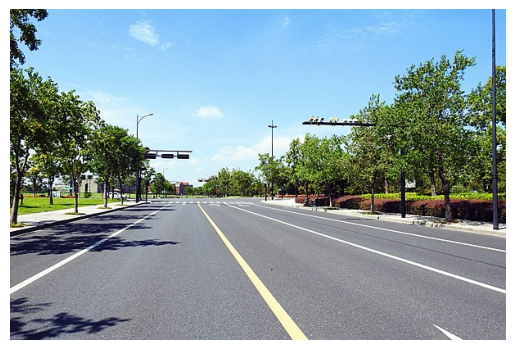

In [48]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

# Define paths to the image and video
path_gambar = '/content/drive/MyDrive/Skilvul Final Project/sample_image/gambar_jalan_lurus.jpg'

# Example of loading and displaying an image
image = mpimg.imread(path_gambar)
plt.imshow(image)
plt.axis('off') # Hide axes
plt.show()

# Color Selection

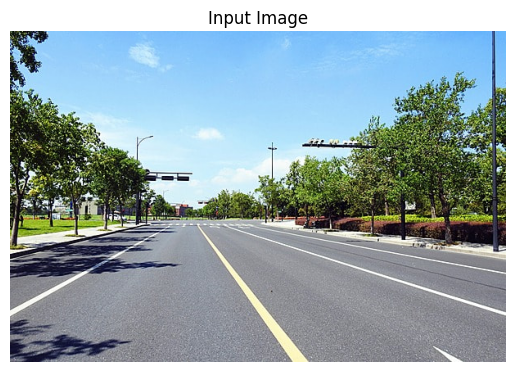

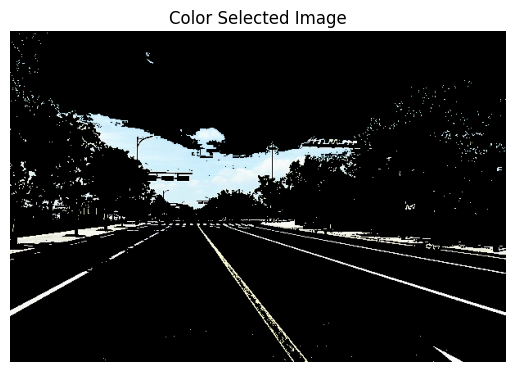

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Define the path to the processed image
path_gambar = '/content/drive/MyDrive/Skilvul Final Project/sample_image/gambar_jalan_lurus.jpg'

# Read in the image
image = mpimg.imread(path_gambar)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(color_select)
plt.title("Color Selected Image")
plt.axis('off')  # Hide axes
plt.show()

# Region Masking

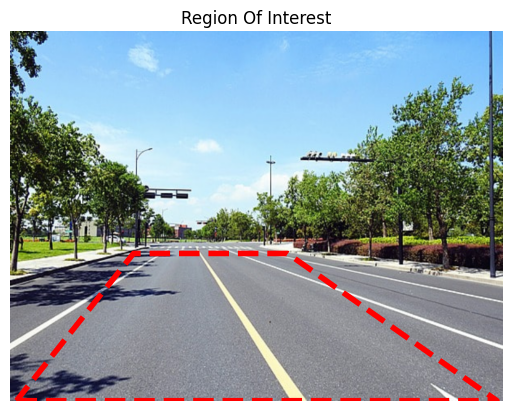

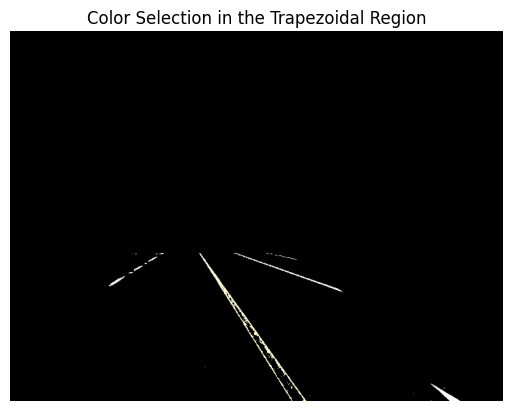

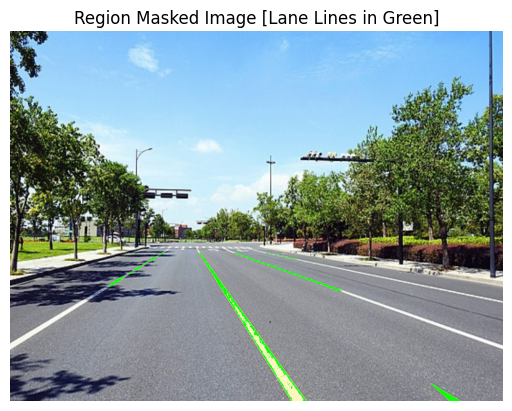

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Define the path to the processed image
path_gambar = '/content/drive/MyDrive/Skilvul Final Project/sample_image/gambar_jalan_lurus.jpg'

# Read in the image
image = mpimg.imread(path_gambar)

# Resize the image to a new size, for example, (800, 600)
new_size = (800, 600)
image_resized = cv2.resize(image, new_size)

# Grab the x and y size of the resized image and make a copy
ysize = image_resized.shape[0]
xsize = image_resized.shape[1]
color_select = np.copy(image_resized)
line_image = np.copy(image_resized)

# Define color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a trapezoidal mask
# Adjust these values to change the size and position of the trapezoid
# Increasing or decreasing the x values of left_bottom and right_bottom changes the bottom width
# Increasing or decreasing the x values of left_top and right_top changes the top width
# Changing the y values will move the vertices up or down, affecting the height of the trapezoid
left_bottom = [10, ysize - 1]          # Bottom left vertex, adjusted to make it wider
right_bottom = [xsize - 10, ysize - 1] # Bottom right vertex, adjusted to make it wider
left_top = [200, int(ysize * 0.6)]     # Top left vertex, adjusted to make it taller and wider
right_top = [xsize - 350, int(ysize * 0.6)] # Top right vertex, adjusted to make it taller and wider

# Create a numpy array of the four points
vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)

# Create a blank mask
mask = np.zeros_like(image_resized)

# Fill the mask with the trapezoid
cv2.fillPoly(mask, vertices, [255, 255, 255])

# Mask pixels below the threshold
color_thresholds = (image_resized[:,:,0] < rgb_threshold[0]) | \
                   (image_resized[:,:,1] < rgb_threshold[1]) | \
                   (image_resized[:,:,2] < rgb_threshold[2])

# Apply the mask to the image
masked_image = cv2.bitwise_and(image_resized, mask)

# Mask color selection
color_select[color_thresholds | (mask[:,:,0] == 0)] = [0, 0, 0]
# Color pixels green where both color and region selections met
line_image[~color_thresholds & (mask[:,:,0] != 0)] = [9, 255, 0]

# Display the images
plt.imshow(image_resized)
x = [left_bottom[0], right_bottom[0], right_top[0], left_top[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], right_top[1], left_top[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(color_select)
plt.title("Color Selection in the Trapezoidal Region")
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.axis('off')  # Hide axes
plt.show()


# Canny Edge Detection

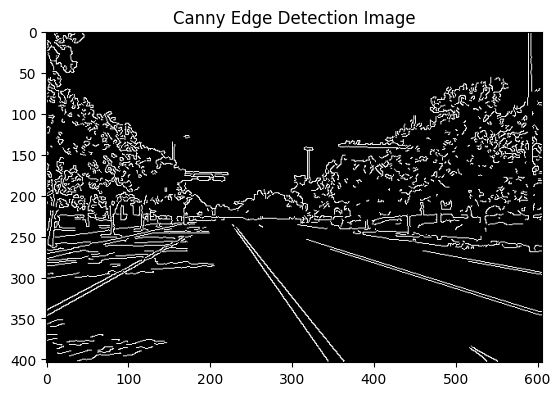

In [51]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('/content/drive/MyDrive/Skilvul Final Project/sample_image/gambar_jalan_lurus.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()

# Hough Transform and detecting Lane Lines  

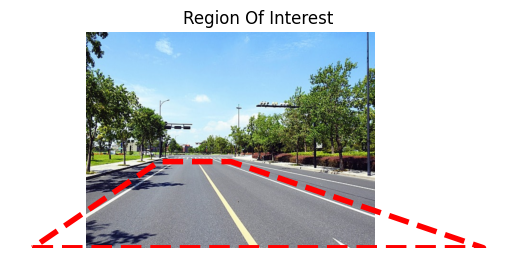

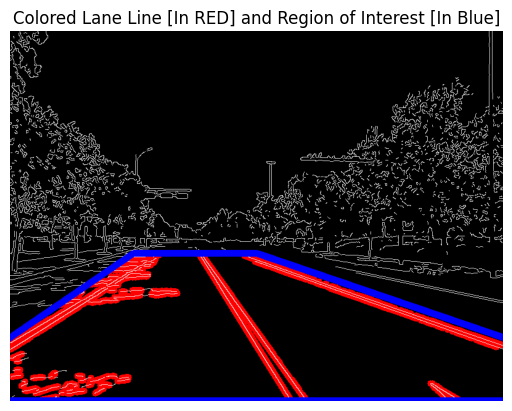

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Define the path to the processed image
path_gambar = '/content/drive/MyDrive/Skilvul Final Project/sample_image/gambar_jalan_lurus.jpg'

# Read in the image
image = mpimg.imread(path_gambar)

# Resize the image to a new size, for example, (800, 600)
new_size = (800, 600)
image_resized = cv2.resize(image, new_size)

# Convert to grayscale
gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

# Apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Define our parameters for Canny and apply
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the vertices of a trapezoidal mask
ysize = image_resized.shape[0]
xsize = image_resized.shape[1]
left_bottom = [-150, ysize - 1]          # Bottom left vertex
right_bottom = [xsize - (-300), ysize - 1] # Bottom right vertex
left_top = [200, int(ysize * 0.6)]     # Top left vertex
right_top = [xsize - 400, int(ysize * 0.6)] # Top right vertex

vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)

# Create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 # minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image_resized) * 0 # creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

# Draw the trapezoidal region on the image
cv2.polylines(lines_edges, [vertices], True, (0, 0, 255), 10)

# Display the images
plt.imshow(image_resized)
x = [left_bottom[0], right_bottom[0], right_top[0], left_top[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], right_top[1], left_top[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(lines_edges)
plt.title("Colored Lane Line [In RED] and Region of Interest [In Blue]")
plt.axis('off')  # Hide axes
plt.show()


# Lane Detection Pipeline

In [53]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.

    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).

    Think about things like separating line segments by their
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of
    the lines and extrapolate to the top and bottom of the lane.

    This function draws `lines` with `color` and `thickness`.
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image,lines):

    img = image.copy()
    poly_vertices = []
    order = [0,1,3,2]

    left_lines = [] # Like /
    right_lines = [] # Like \
    for line in lines:
        for x1,y1,x2,y2 in line:

            if x1 == x2:
                pass #Vertical Lines
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1

                if m < 0:
                    left_lines.append((m,c))
                elif m >= 0:
                    right_lines.append((m,c))

    # Check if left_lines or right_lines are empty and handle accordingly
    if left_lines:
        left_line = np.mean(left_lines, axis=0)
    else:
        left_line = (0, 0) # Assign default values if no left lines

    if right_lines:
        right_line = np.mean(right_lines, axis=0)
    else:
        right_line = (0, 0) # Assign default values if no right lines

    #print(left_line, right_line)

    for slope, intercept in [left_line, right_line]:

        #getting complete height of image in y1
        rows, cols = image.shape[:2]
        y1= int(rows) #image.shape[0]

        #taking y2 upto 60% of actual height or 60% of y1
        y2= int(rows*0.6) #int(0.6*y1)

        #we know that equation of line is y=mx +c so we can write it x=(y-c)/m
        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        poly_vertices.append((x1, y1))
        poly_vertices.append((x2, y2))
        draw_lines(img, np.array([[[x1,y1,x2,y2]]]))

    poly_vertices = [poly_vertices[i] for i in order]
    cv2.fillPoly(img, pts = np.array([poly_vertices],'int32'), color = (0,255,0))
    return cv2.addWeighted(image,0.7,img,0.4,0.)

    #cv2.polylines(img,np.array([poly_vertices],'int32'), True, (0,0,255), 10)
    #print(poly_vertices)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.

    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)
    line_img = slope_lines(line_img,lines)
    return line_img

def weighted_img(img, initial_img, α=0.1, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.

    `initial_img` should be the image before any processing.

    The result image is computed as follows:

    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    lines_edges = cv2.addWeighted(initial_img, α, img, β, γ)
    #lines_edges = cv2.polylines(lines_edges,get_vertices(img), True, (0,0,255), 10)
    return lines_edges
def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6]

    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver

In [54]:
# Lane finding Pipeline
def lane_finding_pipeline(image):

    #Grayscale
    gray_img = grayscale(image)
    #Gaussian Smoothing
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 5)
    #Canny Edge Detection
    canny_img = canny(img = smoothed_img, low_threshold = 180, high_threshold = 240)
    #Masked Image Within a Polygon
    masked_img = region_of_interest(img = canny_img, vertices = get_vertices(image))
    #Hough Transform Lines
    houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
    #Draw lines on edges
    output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)

    return output

# Test our Algorithm Pipeline with different Images

Ukuran gambar solidWhiteRight.jpg: (540, 960, 3)


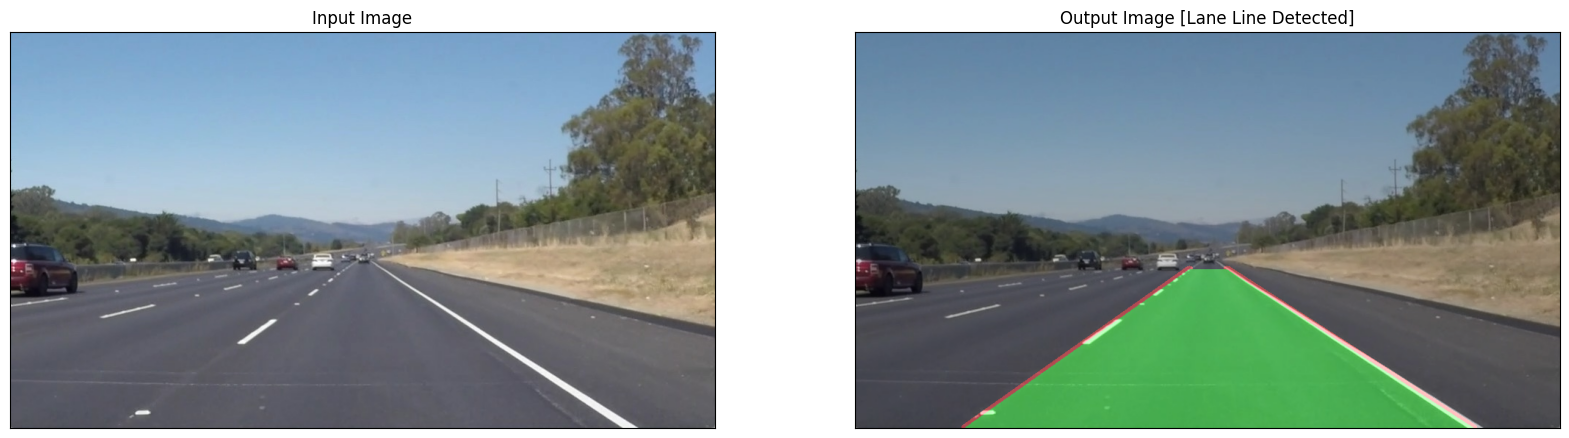

Ukuran gambar solidYellowLeft.jpg: (540, 960, 3)


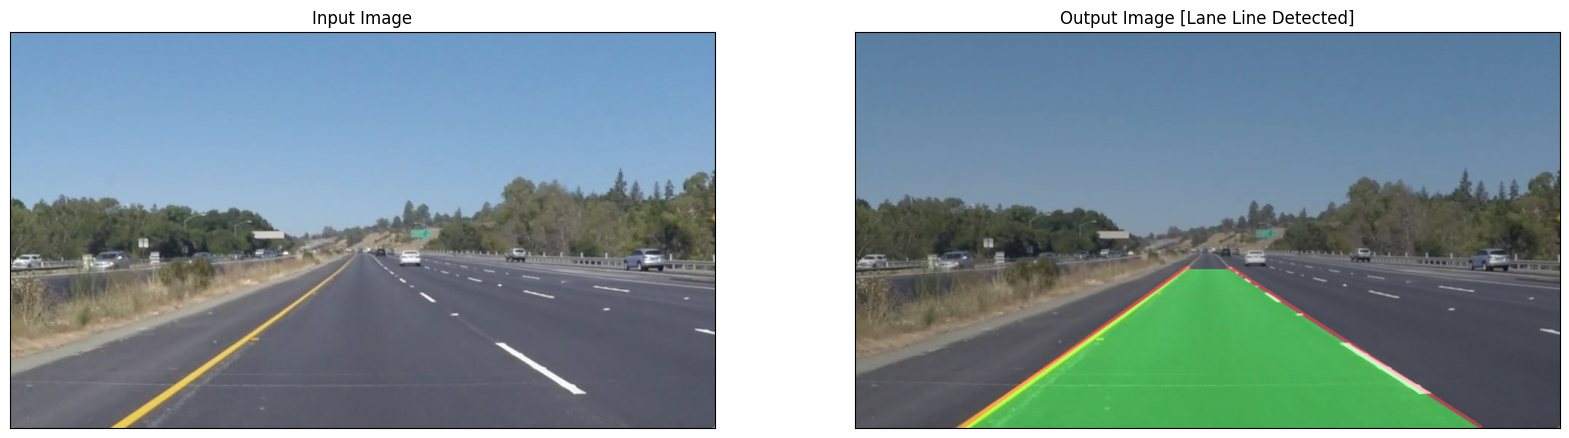

Ukuran gambar solidYellowCurve.jpg: (540, 960, 3)


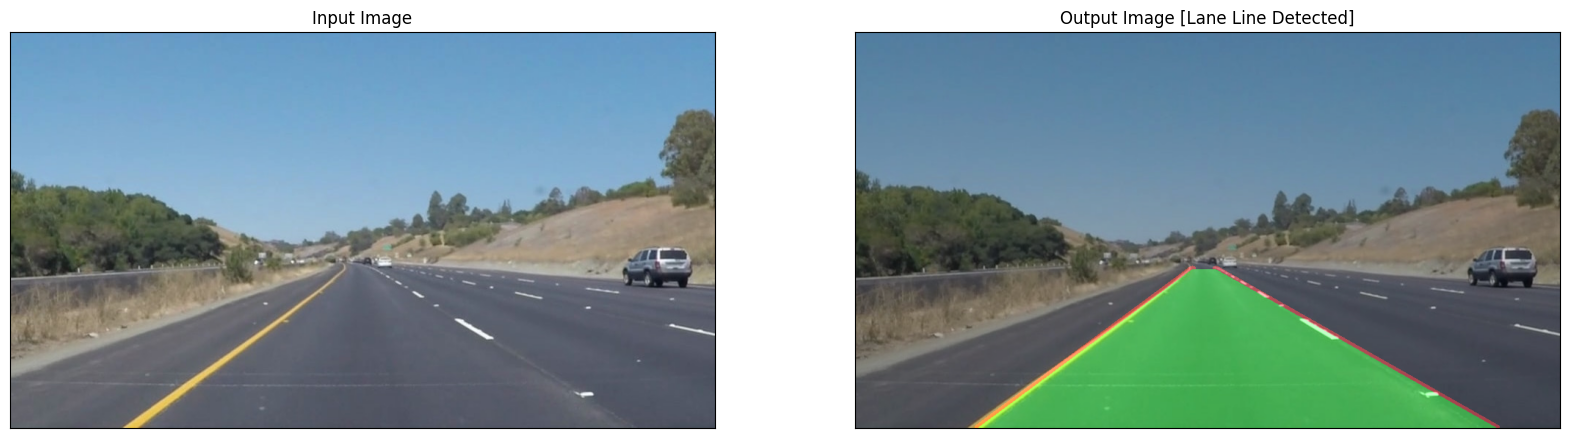

Ukuran gambar whiteCarLaneSwitch.jpg: (540, 960, 3)


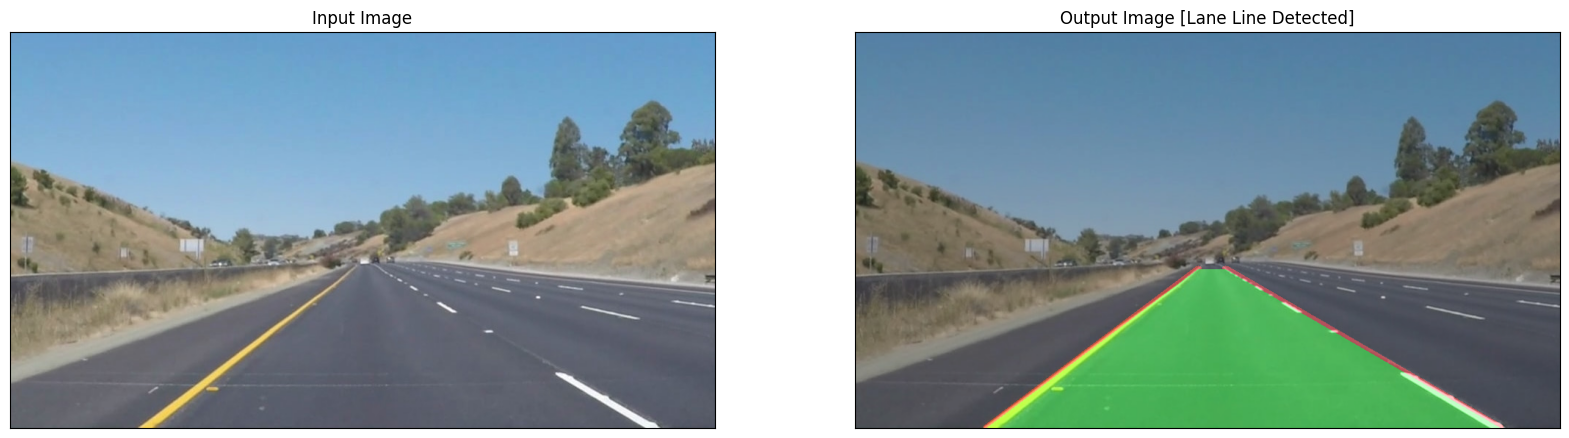

Ukuran gambar solidWhiteCurve.jpg: (540, 960, 3)


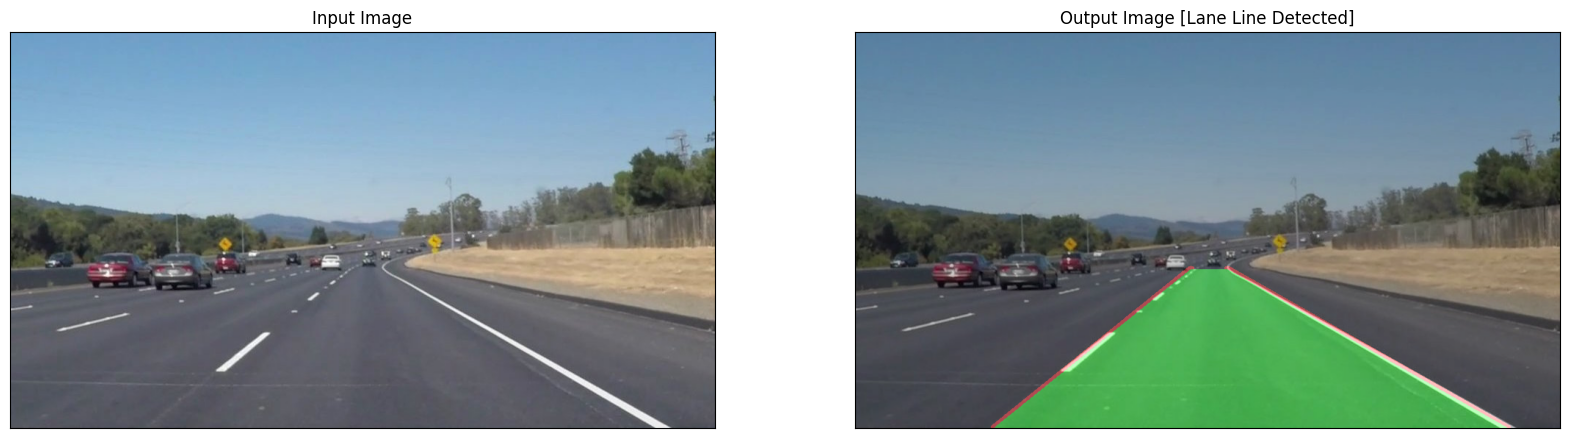

Ukuran gambar solidYellowCurve2.jpg: (540, 960, 3)


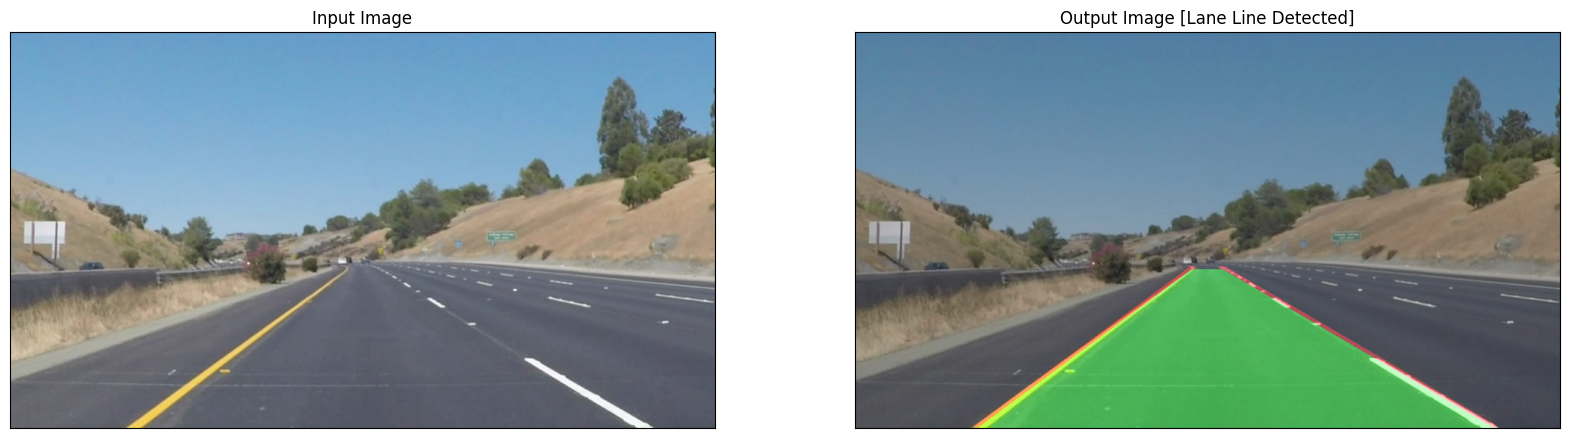

In [55]:
# Define the path to the processed images directory
processed_images_path = '/content/drive/MyDrive/Skilvul Final Project/test_images'

# Read and process each image in the processed images directory
for image_name in os.listdir(processed_images_path):
    image_path = os.path.join(processed_images_path, image_name)
    image = mpimg.imread(image_path)

    # Print ukuran gambar
    print(f"Ukuran gambar {image_name}: {image.shape}")

    # Create a figure to display the input and output images
    fig = plt.figure(figsize=(20, 10))

    # Display the input image
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title("Input Image")

    # Display the output image after lane detection
    ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    plt.imshow(lane_finding_pipeline(image))
    ax.set_title("Output Image [Lane Line Detected]")

    # Show the figure
    plt.show()

# Try Test with Video Stream

In [56]:
!pip install moviepy

In [57]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os
import cv2
import numpy as np

In [58]:
def overlay_pipeline(image):
    # Apply lane detection
    lane_img = lane_finding_pipeline(image)

    # Resize the lane_img to match the original image size (if needed)
    lane_img = cv2.resize(lane_img, (image.shape[1], image.shape[0]))

    # Combine lane_img with the original image
    combined_img = cv2.addWeighted(image, 0.7, lane_img, 0.3, 0)

    return combined_img

In [59]:
# Define paths
input_video_path = '/content/drive/MyDrive/Skilvul Final Project/test_videos/solidWhiteRight.mp4'
output_video_path = '/content/drive/MyDrive/Skilvul Final Project/test_output_video/solidWhiteRight_output.mp4'

# Load video
clip1 = VideoFileClip(input_video_path)

# Apply overlay pipeline to each frame of the video
overlay_clip = clip1.fl_image(overlay_pipeline)

# Write result to file
%time overlay_clip.write_videofile(output_video_path, audio=False)

Moviepy - Building video /content/drive/MyDrive/Skilvul Final Project/test_output_video/solidWhiteRight_output.mp4.
Moviepy - Writing video /content/drive/MyDrive/Skilvul Final Project/test_output_video/solidWhiteRight_output.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Skilvul Final Project/test_output_video/solidWhiteRight_output.mp4
CPU times: user 2.53 s, sys: 369 ms, total: 2.89 s
Wall time: 25.4 s
